In [1]:
#---- Append function directory to the file path ----#
import sys
function_dir = 'C:/Users/angus/Documents/git_repositories/ENGN4350_Honours/subsequence_dtw/'
sys.path.append(function_dir)

#---- Import Modules ----#
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.io import loadmat
import _functions.subsequence_dtw_functions as subsequence_dtw_functions
import _functions.visualisation as visualisation

import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
from scipy.stats import norm 

#---- Set up data structures ----#
linux = 0
if linux:
    print('Directories need to be defined..') # update when you know the directory
else:
    master_mat_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/mat_files/'
    master_subdtw_data_dir = 'D:/Honours/datasets/compressed_data/batch/output/'

filename_dict ={'sunset1' : 'dvs_vpr_2020-04-21-17-03-03.mat',
                'sunset2' : 'dvs_vpr_2020-04-22-17-24-21.mat',
                'night'   : 'dvs_vpr_2020-04-27-18-13-29.mat',
                'daytime' : 'dvs_vpr_2020-04-24-15-12-03.mat',
                'morning' : 'dvs_vpr_2020-04-28-09-14-11.mat',
                'sunrise' : 'dvs_vpr_2020-04-29-06-20-23.mat'}

#---- Colours ----#
green_sea = '#16a085' 
emerald = '#2ecc71'
peter_river = '#3498db'
amythest = '#9b59b6'
carrot = '#e67e22'
pomegranate = '#c0392b'

#---- Plot Params ----#
suptitle_weight = 'bold'
suptitle_size = 16
title_weight = 'bold'
title_size = 14
label_weight = 'normal'
label_size = 12

#### Visualisation - Uncompressed Dataset

In [2]:
mat_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/mat_files/'
filename = 'sunset1'

plot = 0

#---- Load data ----#
data = loadmat(mat_dir + filename_dict[filename])['data']

#---- Get frames ----#
time = 15
hold_time = 0.1

event_frame = visualisation.event_visualisation(data, time, hold_time)
video_frame = visualisation.get_video_frame(filename, time)


#---- Plotting ----#
if plot:
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    fig.suptitle('Event Visualisation via Integration', fontweight=suptitle_weight, fontsize=suptitle_size)
    fig.text(0.5,0.88, f'Dataset: {filename}        Integration Time: {hold_time} s', ha='center', fontweight=label_weight, fontsize=label_size)

    ax[0].imshow(video_frame)
    ax[0].axis('off')
    im = ax[1].imshow(event_frame, cmap='bwr', vmax=5, vmin=-5)
    ax[1].axis('off')
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right", size="2%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label('Accumulated Polarity')
    plt.show()
else:
    plt.ioff()

#### Visualisation - Compressed Dataset

In [3]:
# resolution = 100         # Available: 50 -> '[50-50]'  100 -> '[100-100]'
# filename = 'sunset1'     # Available: 'sunset1'  'sunset2'

# plot = 1 

# #---- Load Data ----#
# mat_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/mat_files/'
# compressed_mat_dir = 'F:/Honours/'  # directory of compressed datasets
# folders = [item for item in os.listdir(mat_dir) if item.startswith(f'resolution_{resolution}')]

# # Load data from every threshold
# threshold_list = [100, 200, 300, 400, 500]
# data_uncomp = loadmat(mat_dir + filename_dict[filename])['data']
# data_100 = loadmat(compressed_mat_dir + f'resolution_[{resolution}-{resolution}]_threshold_{threshold_list[0]}/{filename_dict[filename]}')['data']
# data_200 = loadmat(compressed_mat_dir + f'resolution_[{resolution}-{resolution}]_threshold_{threshold_list[1]}/{filename_dict[filename]}')['data']
# data_300 = loadmat(compressed_mat_dir + f'resolution_[{resolution}-{resolution}]_threshold_{threshold_list[2]}/{filename_dict[filename]}')['data']
# data_400 = loadmat(compressed_mat_dir + f'resolution_[{resolution}-{resolution}]_threshold_{threshold_list[3]}/{filename_dict[filename]}')['data']
# data_500 = loadmat(compressed_mat_dir + f'resolution_[{resolution}-{resolution}]_threshold_{threshold_list[4]}/{filename_dict[filename]}')['data']

# # Get event frames
# time = 15
# compressed_hold_time = [5,5,5,5,5]

# M_uncomp = visualisation.event_visualisation(data_uncomp, time, hold_time=0.1)
# M_100 = visualisation.event_visualisation(data_100, time-compressed_hold_time[0]/2, hold_time=compressed_hold_time[0], cols=resolution+1, rows=resolution+1)
# M_200 = visualisation.event_visualisation(data_200, time-compressed_hold_time[1]/2, hold_time=compressed_hold_time[1], cols=resolution+1, rows=resolution+1)
# M_300 = visualisation.event_visualisation(data_300, time-compressed_hold_time[2]/2, hold_time=compressed_hold_time[2], cols=resolution+1, rows=resolution+1)
# M_400 = visualisation.event_visualisation(data_400, time-compressed_hold_time[3]/2, hold_time=compressed_hold_time[3], cols=resolution+1, rows=resolution+1)
# M_500 = visualisation.event_visualisation(data_500, time-compressed_hold_time[4]/2, hold_time=compressed_hold_time[4], cols=resolution+1, rows=resolution+1)

# #--- Plotting ----#
# if plot:
#     fig, ax = plt.subplots(2,3, figsize=(15,10))
#     fig.suptitle(f'Resolution: ({resolution}-{resolution})', fontweight=suptitle_weight, fontsize=suptitle_size)
#     fig.tight_layout()
#     ax[0][0].imshow(M_uncomp, cmap='bwr', vmin=-5, vmax=5 )
#     ax[0][0].set_title('Uncompressed')
#     ax[0][1].imshow(M_100, cmap='bwr', vmin=-5, vmax=5 )
#     ax[0][1].set_title(f'Threshold: {threshold_list[0]}')
#     ax[0][2].imshow(M_200, cmap='bwr', vmin=-5, vmax=5 )
#     ax[0][2].set_title(f'Threshold: {threshold_list[1]}')
#     ax[1][0].imshow(M_300, cmap='bwr', vmin=-5, vmax=5 )
#     ax[1][0].set_title(f'Threshold: {threshold_list[2]}')
#     ax[1][1].imshow(M_400, cmap='bwr', vmin=-5, vmax=5 )
#     ax[1][1].set_title(f'Threshold: {threshold_list[3]}')
#     ax[1][2].imshow(M_500, cmap='bwr', vmin=-5, vmax=5 )
#     ax[1][2].set_title(f'Threshold: {threshold_list[4]}')
# else:
#     plt.ioff()

#### Camera Bias Images
These are the integrated events over the start of each dataset (for the complete data that I have)

Processing pixel (99,99): 100%|██████████| 10000/10000 [00:34<00:00, 286.94item/s]


Mean STD: 15.959285818697293 	 PPF: 41.108396075512886 	 Bias: -3.197797384069971


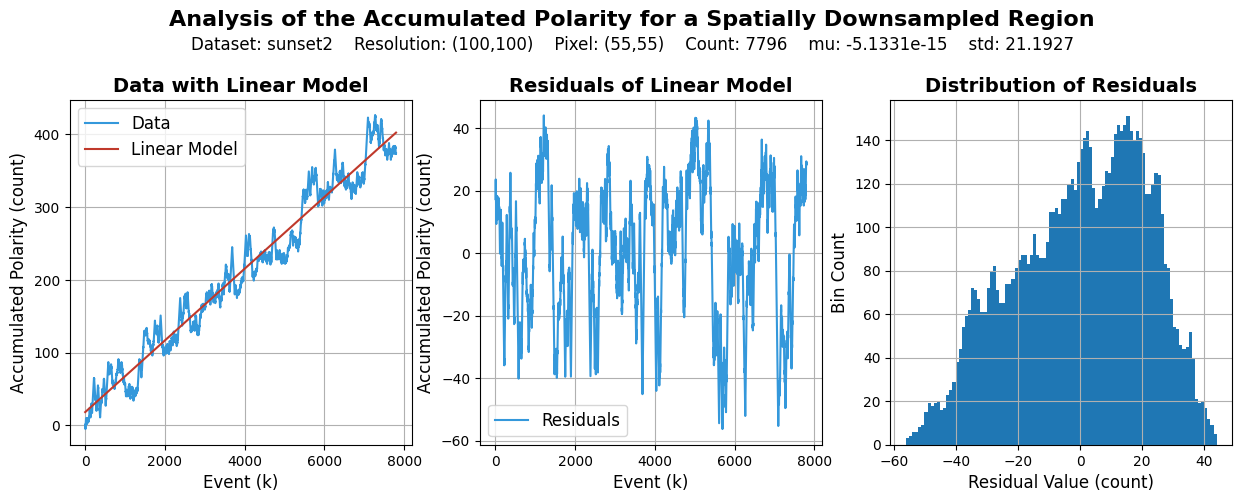

In [27]:
###########################################################################
####                           Import Modules                         #####
###########################################################################
import sys
function_dir = 'C:/Users/angus/Documents/git_repositories/ENGN4350_Honours/subsequence_dtw/'
sys.path.append(function_dir)

#---- Import Modules ----#
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.io import loadmat
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
from tqdm import tqdm
import scipy.stats as stats 

###########################################################################
####                              Set Up                              #####
###########################################################################
#---- Set up data structures ----#
linux = 0
if linux:
    print('Directories need to be defined..') # update when you know the directory
else:
    master_mat_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/mat_files/'
    master_subdtw_data_dir = 'D:/Honours/datasets/compressed_data/batch/output/'

filename_dict ={'sunset1' : 'dvs_vpr_2020-04-21-17-03-03.mat',
                'sunset2' : 'dvs_vpr_2020-04-22-17-24-21.mat',
                'night'   : 'dvs_vpr_2020-04-27-18-13-29.mat',
                'daytime' : 'dvs_vpr_2020-04-24-15-12-03.mat',
                'morning' : 'dvs_vpr_2020-04-28-09-14-11.mat',
                'sunrise' : 'dvs_vpr_2020-04-29-06-20-23.mat'}


filename = 'sunset2'

# data_dir = 'G:/Honours/spatial_compression/resolution_[100-100]/compressed/processed/dvs_vpr_2020-04-22-17-24-21_bias_integration_v2.mat'
data_dir = 'F:/Data/Output_Data/full_dataset/spatial_compression/resolution_[100-100]/processed/dvs_vpr_2020-04-22-17-24-21_bias_integration_v2.mat'
# data_dir = 'F:/Data/Output_Data/full_dataset/spatial_compression/resolution_[100-100]/pos_44_neg_-32/dvs_vpr_2020-04-21-17-03-03_bias_integration'
save_dir = 'F:/Users/angus/OneDrive - Australian National University/Honours/Data/Output Data/subsequence_dtw/compression/resolution_[100-100]/camera_bias_data/'



mat_data = loadmat(data_dir)['accumulation_cell'].T

###########################################################################
####                             Analysis                             #####
###########################################################################
def extract_value(data):
    if isinstance(data, np.ndarray):
        return extract_value(data[0])
    else:
        return data

resolution = 100

#---- Linear Regression Parameters ----#

perform_loop = 1
regression_data_selection = 0       # 0 = accumulation vs event count       1 = accumulation vs time

#---- Looping through every pixel
m = np.zeros_like(mat_data)
event_count = np.zeros_like(mat_data)
avg_event_rate = np.zeros_like(mat_data)
residual_stats = np.zeros((mat_data.shape[0], mat_data.shape[1], 3))

scale_val = 38
percentage = 0.995

if perform_loop:
    iterable = range(mat_data.shape[0]*mat_data.shape[1])
    with tqdm(iterable, desc="Computing regression for each pixel", unit="item") as progress:
        for i in range(mat_data.shape[0]):
            for j in range(mat_data.shape[1]):
                data = mat_data[i,j].T

                if data.shape[0] < 2:
                    continue
                else:
                    # regression of accum vs time
                    if data.shape[1] > 1:
                        if regression_data_selection == 0:
                                y = data[:,0].reshape(-1, 1)
                                x = np.arange(0, len(y), 1).reshape(-1, 1)
                        elif regression_data_selection == 1:
                                y = data[:,0].reshape(-1, 1)
                                x = data[:,1].reshape(-1, 1) - data[0,1]
                        else:
                            raise ValueError('Check regression data selection')
                    else:
                        y = data[:,0].reshape(-1, 1)
                        x = np.arange(0, len(y), 1).reshape(-1, 1)

                    regr = linear_model.LinearRegression()
                    regr.fit(x, y)
                    y_pred = regr.predict(x)
                    residuals = y_pred - y

                    #---- Gaussian Fit ----#
                    mu, std = stats.norm.fit(residuals)
                    ppf = stats.norm.ppf(percentage, loc=mu, scale=std)

                    #---- Get the event count ----#
                    event_count[i,j] = data.shape[0]
                    if data.shape[1] > 1:
                        event_rate = data.shape[0] / (data[-1,1]-data[0,1])
                        avg_event_rate[i,j] = event_rate

                    #---- Store the values ----#
                    m[i,j] = extract_value(regr.coef_)
                    residual_stats[i,j,:] = [mu, std, ppf]

                    progress.set_description(f"Processing pixel ({i},{j})")
                    progress.update(1)


scale = (scale_val*np.ones_like(mat_data))
bias = (- scale * m).astype(float)
     

#---- Pick a single pixel to plot ----#
pixel = [55, 55]
data = mat_data[pixel[0], pixel[1]].T

if data.shape[1] > 1:
    if regression_data_selection == 0:
            y = data[:,0].reshape(-1, 1)
            x = np.arange(0, len(y), 1).reshape(-1, 1)
    elif regression_data_selection == 1:
            y = data[:,0].reshape(-1, 1)
            x = data[:,1].reshape(-1, 1) - data[0,1]
    else:
        raise ValueError('Check regression data selection')
else:
    y = data[:,0].reshape(-1, 1)
    x = np.arange(0, len(y), 1).reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)
residuals = y_pred - y
mu, std = stats.norm.fit(residuals)
# ppf = stats.norm.ppf(percentage, loc=mu, scale=std)
# print(ppf)
std_mean = np.mean(np.ravel(residual_stats[:,1]))
ppf = stats.norm.ppf(percentage, loc=mu, scale=std_mean)
print(f'Mean STD: {std_mean} \t PPF: {ppf} \t Bias: {np.mean(bias)}')

###########################################################################
####                             Plotting                             #####
###########################################################################

show_plot = {'bias_and_percentile'  : 0,
             'regression'           : 0,
             'batch_stats'          : 0,
             'single_pixel'         : 1,
             'time_vs_events'       : 0,
             'event_output'         : 0
            }

#---- Colours ----#
green_sea = '#16a085'
emerald = '#2ecc71'
peter_river = '#3498db'
amythest = '#9b59b6'
carrot = '#e67e22'
pomegranate = '#c0392b'

#---- Plot Params ----#
suptitle_weight = 'bold'
suptitle_size = 16
title_weight = 'bold'
title_size = 14
label_weight = 'normal'
label_size = 12

if perform_loop:
    if show_plot['bias_and_percentile']:
        fig, ax = plt.subplots(1,2, figsize=(12,4))
        fig.subplots_adjust(wspace=0.2)

        ax[0].set_title("Bias Parameter")
        im0 = ax[0].imshow(bias)
        divider0 = make_axes_locatable(ax[0])
        cax0 = divider0.append_axes("right", size="5%", pad=0.05)
        cbar0 = fig.colorbar(im0, cax=cax0)

        ax[1].set_title(f"Value for {percentage*100}% Percentile")
        im1 = ax[1].imshow(residual_stats[:,:,2])
        divider1 = make_axes_locatable(ax[1])
        cax1 = divider1.append_axes("right", size="5%", pad=0.05)
        cbar1 = fig.colorbar(im1, cax=cax1)

        plt.show()

    if show_plot['regression']:
        fig, ax = plt.subplots(1,2, figsize=(12,4))
        fig.subplots_adjust(wspace=0.2)
        ax[0].set_title("Scale Parameter")
        # ax[0].axis('off')
        im0 = ax[0].imshow(scale)
        divider0 = make_axes_locatable(ax[0])
        cax0 = divider0.append_axes("right", size="5%", pad=0.05)
        cbar0 = fig.colorbar(im0, cax=cax0)

        ax[1].set_title("Bias Parameter")
        # ax[1].axis('off')
        im1 = ax[1].imshow(bias)
        divider1 = make_axes_locatable(ax[1])
        cax1 = divider1.append_axes("right", size="5%", pad=0.05)
        cbar1 = fig.colorbar(im1, cax=cax1)
        plt.show()

    if show_plot['batch_stats']:
        fig, ax = plt.subplots(1,3, figsize=(12,4))
        fig.subplots_adjust(wspace=0.3)
        ax[0].set_title("Mean")
        im0 = ax[0].imshow(residual_stats[:,:,0])
        divider0 = make_axes_locatable(ax[0])
        cax0 = divider0.append_axes("right", size="5%", pad=0.05)
        cbar0 = fig.colorbar(im0, cax=cax0)

        ax[1].set_title("Standard Deviation")
        im1 = ax[1].imshow(residual_stats[:,:,1])
        divider1 = make_axes_locatable(ax[1])
        cax1 = divider1.append_axes("right", size="5%", pad=0.05)
        cbar1 = fig.colorbar(im1, cax=cax1)
        
        ax[2].set_title("Value for 90th Percentile")
        im2 = ax[2].imshow(residual_stats[:,:,2], vmax=200)
        divider2 = make_axes_locatable(ax[2])
        cax2 = divider2.append_axes("right", size="5%", pad=0.05)
        cbar2 = fig.colorbar(im2, cax=cax2)
        plt.show()

if show_plot['single_pixel']:
    # data_string = f'Pixel: ({pixel[0]},{pixel[1]})  Count: {len(y)}  Coefficient: {extract_value(regr.coef_):.4f}  Intercept: {extract_value(regr.intercept_):.4f}  mu: {mu:.4e}  std: {std:.4f}'
    data_string = f'Dataset: {filename}    Resolution: ({resolution},{resolution})    Pixel: ({pixel[0]},{pixel[1]})    Count: {len(y)}    mu: {mu:.4e}    std: {std:.4f}'

    fig, ax = plt.subplots(1,3, figsize=(15,5))
    fig.suptitle('Analysis of the Accumulated Polarity for a Spatially Downsampled Region', fontweight=suptitle_weight, fontsize=suptitle_size)
    fig.subplots_adjust(top=0.8)
    fig.text(0.5, 0.9, data_string, ha='center', fontweight=label_weight, fontsize=label_size)
    #---- Linear Fit ----#
    ax[0].set_title('Data with Linear Model', fontweight=title_weight, fontsize=title_size)
    ax[0].plot(x, y, label='Data', color=peter_river)
    ax[0].plot(x, y_pred, label='Linear Model', color=pomegranate)
    ax[0].legend(fontsize=label_size)
    ax[0].grid(which='both')
    ax[0].set_ylabel('Accumulated Polarity (count)', fontweight=label_weight, fontsize=label_size)
    if regression_data_selection == 0:  
        ax[0].set_xlabel('Event (k)', fontweight=label_weight, fontsize=label_size)
    elif regression_data_selection == 1:  
        ax[0].set_xlabel('Time (s)', fontweight=label_weight, fontsize=label_size)

    #---- Residuals ----#
    ax[1].set_title('Residuals of Linear Model', fontweight=title_weight, fontsize=title_size) 
    ax[1].plot(x, residuals, label='Residuals', color=peter_river)
    ax[1].legend(fontsize=label_size)
    ax[1].grid(which='both')
    ax[1].set_ylabel('Accumulated Polarity (count)', fontweight=label_weight, fontsize=label_size)
    if regression_data_selection == 0:  
        ax[1].set_xlabel('Event (k)', fontweight=label_weight, fontsize=label_size)
    elif regression_data_selection == 1:  
        ax[1].set_xlabel('Time (s)', fontweight=label_weight, fontsize=label_size)

    #---- Histogram with Gaussian ----#
    ax[2].set_title('Distribution of Residuals', fontweight=title_weight, fontsize=title_size)
    ax[2].hist(residuals, bins=100)
    ax[2].grid(which='both')
    ax[2].set_xlabel('Residual Value (count)', fontweight=label_weight, fontsize=label_size)
    ax[2].set_ylabel('Bin Count', fontweight=label_weight, fontsize=label_size)
    plt.show()
        
if show_plot['event_output']:
    fig, ax = plt.subplots(1, 2, figsize=(12,8))
    fig.subplots_adjust(wspace=0.4)
    ax[0].set_title("Total Events per Pixel", fontweight=title_weight, fontsize=title_size)
    im1 = ax[0].imshow(event_count.astype(float))
    divider1 = make_axes_locatable(ax[0])
    cax1 = divider1.append_axes("right", size="5%", pad=0.05)
    cbar1 = fig.colorbar(im1, cax=cax1, label='Event Count')

    ax[1].set_title("Average Event Rate per Pixel", fontweight=title_weight, fontsize=title_size)
    im2 = ax[1].imshow(avg_event_rate.astype(float))
    divider2 = make_axes_locatable(ax[1])
    cax2 = divider2.append_axes("right", size="5%", pad=0.05)
    cbar2 = fig.colorbar(im2, cax=cax2, label='Events per Second')
    plt.show()




In [36]:
scale_val_mean = np.mean(residual_stats[:,:,2])
scale_mean = (scale_val_mean*np.ones_like(mat_data))
bias_mean = (- scale_mean * m).astype(float)

scale_val_median = np.median(residual_stats[:,:,2])
scale_median = (scale_val_median*np.ones_like(mat_data))
bias_median = (- scale_median * m).astype(float)

scale_val = 20
scale_choice = (scale_val*np.ones_like(mat_data))
bias_choice = (-scale_choice * m).astype(float)

data_string = f'''
Value for {percentage*100}% of Residual Distribution:
    - Mean:     {np.mean(residual_stats[:,:,2])}
    - Median:   {np.median(residual_stats[:,:,2])}

Bias Parameter:
    - Mean:     {np.mean(bias_mean)}
    - Median:   {np.median(bias_median)}
    - Choice:   {scale_val} --> {np.mean(bias_choice)}
'''

print(data_string)


Value for 99.0% of Residual Distribution:
    - Mean:     38.112782984434894
    - Median:   36.48177253144836

Bias Parameter:
    - Mean:     -3.207288361243484
    - Median:   -2.4862960064330837
    - Choice:   20 --> -1.683051254773669



#### Event Accumulation after Thresholding

In [3]:
###########################################################################
####                           Import Modules                         #####
###########################################################################
import sys
function_dir = 'C:/Users/angus/Documents/git_repositories/ENGN4350_Honours/subsequence_dtw/'
sys.path.append(function_dir)

#---- Import Modules ----#
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.io import loadmat
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
from tqdm import tqdm
import scipy.stats as stats 

###########################################################################
####                              Set Up                              #####
###########################################################################
#---- Set up data structures ----#
linux = 0
if linux:
    print('Directories need to be defined..') # update when you know the directory
else:
    master_mat_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/mat_files/'
    master_subdtw_data_dir = 'D:/Honours/datasets/compressed_data/batch/output/'

filename_dict ={'sunset1' : 'dvs_vpr_2020-04-21-17-03-03.mat',
                'sunset2' : 'dvs_vpr_2020-04-22-17-24-21.mat',
                'night'   : 'dvs_vpr_2020-04-27-18-13-29.mat',
                'daytime' : 'dvs_vpr_2020-04-24-15-12-03.mat',
                'morning' : 'dvs_vpr_2020-04-28-09-14-11.mat',
                'sunrise' : 'dvs_vpr_2020-04-29-06-20-23.mat'}


filename = 'sunset2'

# data_dir = 'G:/Honours/spatial_compression/resolution_[100-100]/compressed/processed/dvs_vpr_2020-04-22-17-24-21_bias_integration_v2.mat'
data_dir = 'F:/Data/Output_Data/full_dataset/spatial_compression/resolution_[100-100]/processed/dvs_vpr_2020-04-22-17-24-21_bias_integration.mat'
# data_dir = 'F:/Data/Output_Data/full_dataset/spatial_compression/resolution_[100-100]/pos_44_neg_-32/dvs_vpr_2020-04-21-17-03-03_bias_integration'
save_dir = 'F:/Users/angus/OneDrive - Australian National University/Honours/Data/Output Data/subsequence_dtw/compression/resolution_[100-100]/camera_bias_data/'
## UPDATE AS NEEDED ##
pos_threshold = 44
neg_threshold = -32 

mat_data = loadmat(data_dir)['accumulation_cell'].T

###########################################################################
####                             Analysis                             #####
###########################################################################
def extract_value(data):
    if isinstance(data, np.ndarray):
        return extract_value(data[0])
    else:
        return data

resolution = 100

#---- Linear Regression Parameters ----#
perform_loop = 0
percentrage = 0.995

#---- Looping through every pixel
m = np.zeros_like(mat_data)
event_count = np.zeros_like(mat_data)
avg_event_rate = np.zeros_like(mat_data)
residual_stats = np.zeros((mat_data.shape[0], mat_data.shape[1], 2))

if perform_loop:
    iterable = range(mat_data.shape[0]*mat_data.shape[1])
    with tqdm(iterable, desc="Computing regression for each pixel", unit="item") as progress:
        for i in range(mat_data.shape[0]):
            for j in range(mat_data.shape[1]):
                data = mat_data[i,j].T

                if data.shape[0] < 2:
                    continue
                else:
                    # regression of accum vs time
                    if data.shape[1] > 1:
                        y = data[:,0].reshape(-1, 1)
                        x = np.arange(0, len(y), 1).reshape(-1, 1)
                    else:
                        y = data[:,0].reshape(-1, 1)
                        x = np.arange(0, len(y), 1).reshape(-1, 1)

                    regr = linear_model.LinearRegression()
                    regr.fit(x, y)
                    y_pred = regr.predict(x)
                    residuals = y_pred - y

                    #---- Gaussian Fit ----#
                    mu, std = stats.norm.fit(residuals)

                    #---- Get the event count ----#
                    event_count[i,j] = data.shape[0]
                    if data.shape[1] > 1:
                        event_rate = data.shape[0] / (data[-1,1]-data[0,1])
                        avg_event_rate[i,j] = event_rate

                    #---- Store the values ----#
                    m[i,j] = extract_value(regr.coef_)
                    residual_stats[i,j,:] = [mu, std]

                    progress.set_description(f"Processing pixel ({i},{j})")
                    progress.update(1)

#---- Pick a single pixel to plot ----#
pixel = [50, 50]
data = mat_data[pixel[0], pixel[1]].T

if data.shape[1] > 1:
    y = data[:,0].reshape(-1, 1)
    x = np.arange(0, len(y), 1).reshape(-1, 1)
else:
    y = data[:,0].reshape(-1, 1)
    x = np.arange(0, len(y), 1).reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)
residuals = y_pred - y
mu, std = stats.norm.fit(residuals)
ppf = stats.norm.ppf(percentage, loc=mu, scale=std)


np.save(save_dir+'regr_coef.npy', m)



###########################################################################
####                             Plotting                             #####
###########################################################################

show_plot = {'batch_stats'          : 0,
             'single_pixel'         : 1,
             'time_vs_events'       : 0,
             'event_output'         : 0
            }

#---- Colours ----#
green_sea = '#16a085'
emerald = '#2ecc71'
peter_river = '#3498db'
amythest = '#9b59b6'
carrot = '#e67e22'
pomegranate = '#c0392b'

#---- Plot Params ----#
suptitle_weight = 'bold'
suptitle_size = 16
title_weight = 'bold'
title_size = 14
label_weight = 'normal'
label_size = 12

if perform_loop:
    if show_plot['batch_stats']:
        fig, ax = plt.subplots(1,3, figsize=(12,4))
        fig.subplots_adjust(wspace=0.3)
        ax[0].set_title("Mean")
        im0 = ax[0].imshow(residual_stats[:,:,0])
        divider0 = make_axes_locatable(ax[0])
        cax0 = divider0.append_axes("right", size="5%", pad=0.05)
        cbar0 = fig.colorbar(im0, cax=cax0)

        ax[1].set_title("Standard Deviation")
        im1 = ax[1].imshow(residual_stats[:,:,1])
        divider1 = make_axes_locatable(ax[1])
        cax1 = divider1.append_axes("right", size="5%", pad=0.05)
        cbar1 = fig.colorbar(im1, cax=cax1)
        
        ax[2].set_title("Gradient of Linear Regression")
        im2 = ax[2].imshow(m.astype(float))
        divider2 = make_axes_locatable(ax[2])
        cax2 = divider2.append_axes("right", size="5%", pad=0.05)
        cbar2 = fig.colorbar(im2, cax=cax2)
        plt.show()

if show_plot['single_pixel']:
    # data_string = f'Pixel: ({pixel[0]},{pixel[1]})  Count: {len(y)}  Coefficient: {extract_value(regr.coef_):.4f}  Intercept: {extract_value(regr.intercept_):.4f}  mu: {mu:.4e}  std: {std:.4f}'
    data_string = f'Dataset: {filename}    Resolution: ({resolution},{resolution})    Pixel: ({pixel[0]},{pixel[1]})    Count: {len(y)}    mu: {mu:.4e}    std: {std:.4f}'

    fig, ax = plt.subplots(1,3, figsize=(15,5))
    fig.suptitle('Analysis of the Accumulated Polarity for a Spatially Downsampled Region', fontweight=suptitle_weight, fontsize=suptitle_size)
    fig.subplots_adjust(top=0.8)
    fig.text(0.5, 0.9, data_string, ha='center', fontweight=label_weight, fontsize=label_size)
    #---- Linear Fit ----#
    ax[0].set_title('Data with Linear Model', fontweight=title_weight, fontsize=title_size)
    ax[0].plot(x, y, label='Actual Data', color=peter_river)
    ax[0].plot(x, y_pred, label='Linear Model', color=pomegranate)
    ax[0].legend(fontsize=label_size)
    ax[0].grid(which='both')
    ax[0].set_ylabel('Accumulated Polarity (count)', fontweight=label_weight, fontsize=label_size)
    if regression_data_selection == 0:  
        ax[0].set_xlabel('Event (k)', fontweight=label_weight, fontsize=label_size)
    elif regression_data_selection == 1:  
        ax[0].set_xlabel('Time (s)', fontweight=label_weight, fontsize=label_size)

    #---- Residuals ----#
    ax[1].set_title('Residuals of Linear Model', fontweight=title_weight, fontsize=title_size) 
    ax[1].plot(x, residuals, label='Residuals', color=peter_river)
    ax[1].legend(fontsize=label_size)
    ax[1].grid(which='both')
    ax[1].set_ylabel('Accumulated Polarity (count)', fontweight=label_weight, fontsize=label_size)
    if regression_data_selection == 0:  
        ax[1].set_xlabel('Event (k)', fontweight=label_weight, fontsize=label_size)
    elif regression_data_selection == 1:  
        ax[1].set_xlabel('Time (s)', fontweight=label_weight, fontsize=label_size)

    #---- Histogram with Gaussian ----#
    ax[2].set_title('Distribution of Residuals', fontweight=title_weight, fontsize=title_size)
    ax[2].hist(residuals, bins=100)
    ax[2].grid(which='both')
    ax[2].set_xlabel('Residual Value (count)', fontweight=label_weight, fontsize=label_size)
    ax[2].set_ylabel('Bin Count', fontweight=label_weight, fontsize=label_size)
    plt.show()

        
if show_plot['event_output']:
    fig, ax = plt.subplots(1, 2, figsize=(12,8))
    fig.subplots_adjust(wspace=0.4)
    ax[0].set_title("Total Events per Pixel", fontweight=title_weight, fontsize=title_size)
    im1 = ax[0].imshow(event_count.astype(float))
    divider1 = make_axes_locatable(ax[0])
    cax1 = divider1.append_axes("right", size="5%", pad=0.05)
    cbar1 = fig.colorbar(im1, cax=cax1, label='Event Count')

    ax[1].set_title("Average Event Rate per Pixel", fontweight=title_weight, fontsize=title_size)
    im2 = ax[1].imshow(avg_event_rate.astype(float))
    divider2 = make_axes_locatable(ax[1])
    cax2 = divider2.append_axes("right", size="5%", pad=0.05)
    cbar2 = fig.colorbar(im2, cax=cax2, label='Events per Second')
    plt.show()




NotImplementedError: Please use HDF reader for matlab v7.3 files, e.g. h5py

#### Event Rate 

In [ ]:
master_mat_dir = 'C:/Users/angus/OneDrive - Australian National University/Honours/Data/Datasets/mat_files/'
master_data_dir = 'G:/Honours/spatial_compression/resolution_[100-100]/compressed/pos_20_neg_-15/'

mat_dir = master_mat_dir + filename_dict['sunset2']
data_dir = master_data_dir + filename_dict['sunset2']

#---- Original Data ----# 
original_data = loadmat(mat_dir)['data']
original_data[:,0] -= original_data[0,0]
original_data_rounded = np.floor(original_data[:,0])
original_data_step_index = np.where(np.diff(original_data_rounded)==1)[0]
original_events_per_second = np.diff(original_data_step_index)

#---- Compressed Data ----#
compressed_data = loadmat(data_dir)['data']
compressed_data[:,0] -= compressed_data[0,0]
compresssed_data_rounded = np.floor(compressed_data[:,0])
compressed_data_step_index = np.where(np.diff(compresssed_data_rounded)==1)[0]
compressed_events_per_second = np.diff(compressed_data_step_index)

#---- Plotting ----#
show_plot = {'event_rate_comparison' : 0
             }

if show_plot['event_rate_comparison']:
    xlims = [0, 32]
    fig, ax = plt.subplots(1,3, figsize=(12,4))
    fig.suptitle('Comparison of Event Rate Before and After Compression', fontweight=suptitle_weight, fontsize=suptitle_size)
    fig.subplots_adjust(top=0.8, wspace=0.3)

    ax[0].set_title('Combined', fontweight=title_weight, fontsize=title_size)
    ax[0].set_xlabel('Time (s)', fontweight=label_weight, fontsize=label_size)
    ax[0].set_ylabel('Event Rate (ev/s)', fontweight=label_weight, fontsize=label_size)
    ax[0].plot(original_events_per_second, color=peter_river, label='Original')
    ax[0].plot(compressed_events_per_second, color=pomegranate, label='Compressed')
    ax[0].set_xlim(xlims)
    ax[0].grid(which='both')
    ax[0].legend()

    ax[1].set_title('Original', fontweight=title_weight, fontsize=title_size)
    ax[1].set_xlabel('Time (s)', fontweight=label_weight, fontsize=label_size)
    ax[1].set_ylabel('Event Rate (ev/s)', fontweight=label_weight, fontsize=label_size)
    ax[1].plot(original_events_per_second, color=peter_river)
    ax[1].grid(which='both')
    ax[1].set_xlim(xlims)

    ax[2].set_title('Compressed', fontweight=title_weight, fontsize=title_size)
    ax[2].set_xlabel('Time (s)', fontweight=label_weight, fontsize=label_size)
    ax[2].set_ylabel('Event Rate (ev/s)', fontweight=label_weight, fontsize=label_size)
    ax[2].plot(compressed_events_per_second, color=pomegranate)
    ax[2].grid(which='both')
    ax[2].set_xlim(xlims)

    plt.show()


#### Spatial Decimation Compression

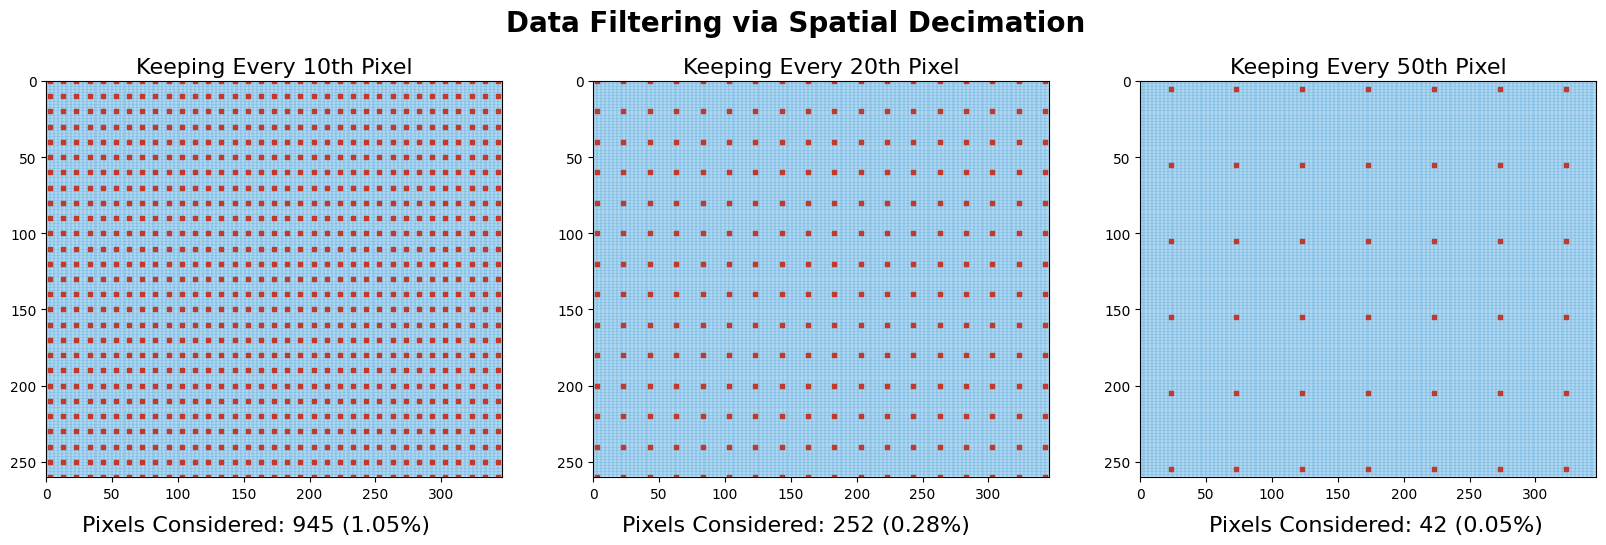

In [93]:
def generate_filter_spacing_points(filter_gap, rows, cols):
    row_init_spacing = (rows%filter_gap)//2
    col_init_spacing = (cols%filter_gap)//2

    row_pixels = np.arange(row_init_spacing, rows+1, filter_gap)
    col_pixels = np.arange(col_init_spacing, cols+1, filter_gap)

    chosen_pixels = [] 
    for i in row_pixels:
        for j in col_pixels:
            chosen_pixels.append([i, j])
    pixel_array = np.asarray(chosen_pixels)
    return pixel_array

rows = 260
cols = 346

suptitle_size = 20
label_size = 16
pixel_array_10 = generate_filter_spacing_points(10, rows, cols)
pixel_array_20 = generate_filter_spacing_points(20, rows, cols)
pixel_array_50 = generate_filter_spacing_points(50, rows, cols)


#---- Figure ----#
fig, ax = plt.subplots(1,3,figsize=(20,6))
fig.suptitle("Data Filtering via Spatial Decimation", fontweight=suptitle_weight, fontsize=suptitle_size)
fig.subplots_adjust(top=0.86, bottom=0.2)
for i in range(rows):
    ax[0].axhline(i, alpha=0.2, color=peter_river, zorder=0)
    ax[1].axhline(i, alpha=0.2, color=peter_river, zorder=0)
    ax[2].axhline(i, alpha=0.2, color=peter_river, zorder=0)

for i in range(cols):
    ax[0].axvline(i, alpha=0.2, color=peter_river, zorder=0)    
    ax[1].axvline(i, alpha=0.2, color=peter_river, zorder=0)
    ax[2].axvline(i, alpha=0.2, color=peter_river, zorder=0)

ax[0].scatter(pixel_array_10[:,1], pixel_array_10[:,0], color=pomegranate, marker='s', s=5, zorder=2)
ax[0].set_title("Keeping Every 10th Pixel", fontweight=label_weight, fontsize=label_size)
fig.text(0.23, 0.11, f"Pixels Considered: {pixel_array_10.shape[0]} ({(pixel_array_10.shape[0]/(rows*cols))*100:.2f}%)", ha='center', fontweight=label_weight, fontsize=label_size)
ax[0].set_xlim([0,cols])
ax[0].set_ylim([0,rows])
ax[0].invert_yaxis()

ax[1].scatter(pixel_array_20[:,1], pixel_array_20[:,0], color=pomegranate, marker='s', s=5, zorder=2)
ax[1].set_title("Keeping Every 20th Pixel", fontweight=label_weight, fontsize=label_size)
fig.text(0.5, 0.11, f"Pixels Considered: {pixel_array_20.shape[0]} ({(pixel_array_20.shape[0]/(rows*cols))*100:.2f}%)", ha='center', fontweight=label_weight, fontsize=label_size)
ax[1].set_xlim([0,cols])
ax[1].set_ylim([0,rows])
ax[1].invert_yaxis()

ax[2].scatter(pixel_array_50[:,1], pixel_array_50[:,0], color=pomegranate, marker='s', s=5, zorder=2)
ax[2].set_title("Keeping Every 50th Pixel", fontweight=label_weight, fontsize=label_size)
fig.text(0.79, 0.11, f"Pixels Considered: {pixel_array_50.shape[0]} ({(pixel_array_50.shape[0]/(rows*cols))*100:.2f}%)", ha='center', fontweight=label_weight, fontsize=label_size)

ax[2].set_xlim([0,cols])
ax[2].set_ylim([0,rows])
ax[2].invert_yaxis()

plt.show()


#### Pooling Data Compression

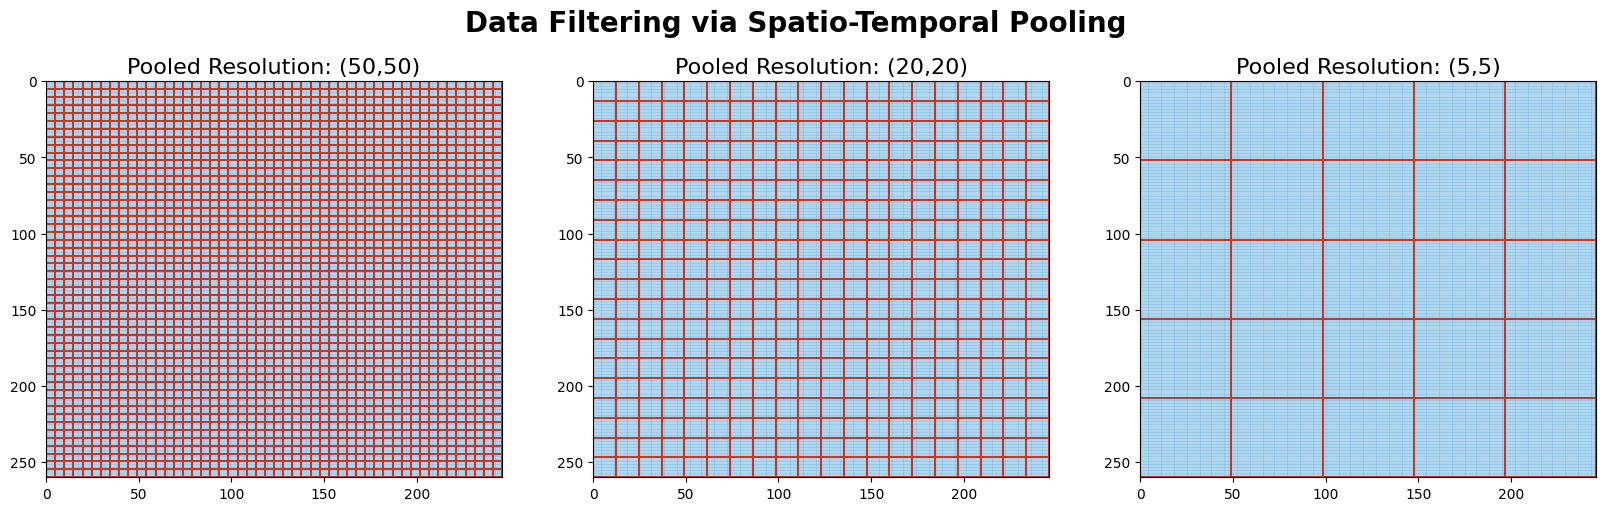

In [115]:
rows = 260
cols = 246

#---- Figure ----#
fig, ax = plt.subplots(1,3,figsize=(20,6))
fig.suptitle("Data Filtering via Spatio-Temporal Pooling", fontweight=suptitle_weight, fontsize=suptitle_size)
fig.subplots_adjust(top=0.86, bottom=0.2)
for i in range(rows):
    ax[0].axhline(i, alpha=0.2, color=peter_river, zorder=0)
    ax[1].axhline(i, alpha=0.2, color=peter_river, zorder=0)
    ax[2].axhline(i, alpha=0.2, color=peter_river, zorder=0)

for i in range(cols):
    ax[0].axvline(i, alpha=0.2, color=peter_river, zorder=0)    
    ax[1].axvline(i, alpha=0.2, color=peter_river, zorder=0)
    ax[2].axvline(i, alpha=0.2, color=peter_river, zorder=0)

regions_1 = 50
for i in np.linspace(0, rows, regions_1+1):
    ax[0].axhline(i, color=pomegranate)
for i in np.linspace(0, cols, regions_1+1):
    ax[0].axvline(i, color=pomegranate)

ax[0].set_title(f"Pooled Resolution: ({regions_1},{regions_1})", fontweight=label_weight, fontsize=label_size)
ax[0].set_xlim([0,cols])
ax[0].set_ylim([0,rows])
ax[0].invert_yaxis()

regions_2 = 20
for i in np.linspace(0, rows, regions_2+1):
    ax[1].axhline(i, color=pomegranate)
for i in np.linspace(0, cols, regions_2+1):
    ax[1].axvline(i, color=pomegranate)

ax[1].set_title(f"Pooled Resolution: ({regions_2},{regions_2})", fontweight=label_weight, fontsize=label_size)
ax[1].set_xlim([0,cols])
ax[1].set_ylim([0,rows])
ax[1].invert_yaxis()

regions_3 = 5
for i in np.linspace(0, rows, regions_3+1):
    ax[2].axhline(i, color=pomegranate)
for i in np.linspace(0, cols, regions_3+1):
    ax[2].axvline(i, color=pomegranate)

ax[2].set_title(f"Pooled Resolution: ({regions_3},{regions_3})", fontweight=label_weight, fontsize=label_size)
ax[2].set_xlim([0,cols])
ax[2].set_ylim([0,rows])
ax[2].invert_yaxis()
plt.show()
